In [10]:
import os
import numpy as np
import sys
sys.path.append('../')
from utils.VisualisationUtils import *
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf

In [4]:
# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\temp\yolov8s-seg_float32.tflite'
# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8n-640-3e4-mosaic-b16-ndata\weights\yolov8n-seg_float32.tflite'
# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8n-640-3e4-mosaic-b16-ndata\weights\yolo11n-seg_float32.tflite'
# image_path = 'dog.jpeg'

# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8n-640-3e4-mosaic-b16-ndata\weights\best_nms_float32.tflite'
# image_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples\IMG-20250324-WA0018.jpg'

model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolo11n-640-3e4-mosaic-b16-ndata\weights\y11n_best_float32.tflite'
image_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples\IMG-20250324-WA0018.jpg'

interpreter = tf.lite.Interpreter(model_path=model_path)
image = cv2.imread(image_path)
# === Load TFLite model ===
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [6]:
input_details, output_details

([{'name': 'images',
   'index': 0,
   'shape': array([  1, 640, 640,   3], dtype=int32),
   'shape_signature': array([  1, 640, 640,   3], dtype=int32),
   'dtype': numpy.float32,
   'quantization': (0.0, 0),
   'quantization_parameters': {'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32),
    'quantized_dimension': 0},
   'sparsity_parameters': {}}],
 [{'name': 'Identity',
   'index': 1148,
   'shape': array([  1, 300,  38], dtype=int32),
   'shape_signature': array([  1, 300,  38], dtype=int32),
   'dtype': numpy.float32,
   'quantization': (0.0, 0),
   'quantization_parameters': {'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32),
    'quantized_dimension': 0},
   'sparsity_parameters': {}},
  {'name': 'Identity_1',
   'index': 1040,
   'shape': array([  1, 160, 160,  32], dtype=int32),
   'shape_signature': array([  1, 160, 160,  32], dtype=int32),
   'dtype': numpy.float32,
   'quantization': (0.0, 0),
   'quantization_parame

In [ ]:
# === Load and preprocess image ===
input_h, input_w = input_details[0]['shape'][1:3]
image_resized = cv2.resize(image, (input_w, input_h))
# image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
input_tensor = np.expand_dims(image_resized.astype(np.float32) / 255.0, axis=0)

# === Run inference ===
interpreter.set_tensor(input_details[0]['index'], input_tensor)
interpreter.invoke()

# === Get detection head output ===
output = interpreter.get_tensor(output_details[0]['index'])  # shape (1, 39, 8400)
output = np.squeeze(output)  # shape (39, 8400)

In [153]:
output1 = interpreter.get_tensor(output_details[1]['index'])
proto_masks = np.squeeze(output1)  # shape (160, 160, 32)
proto_masks.shape

(160, 160, 32)

In [164]:
mask_weights = output[0, -32:]  # shape (32,)
mask_weights = mask_weights.reshape(-1, 1)  # shape (32, 1)
mask_weights.shape

(32, 1)

In [184]:
mask = np.matmul(proto_masks, mask_weights)  # shape (160, 160, 1)
mask = np.squeeze(mask)  # shape (160, 160)
# Normalize by weights sum
# mask = mask / np.sum(mask_weights)  # shape (160, 160)
mask.shape

(160, 160)

In [175]:
cv2.imwrite('mask.png', mask * 255)  # Save the mask as an image

True

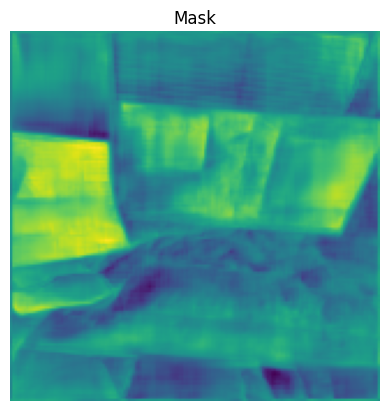

In [189]:
plt.imshow(mask)
plt.title('Mask')
plt.axis('off')
plt.show()

In [179]:
np.max(mask)

np.float32(9.452073)

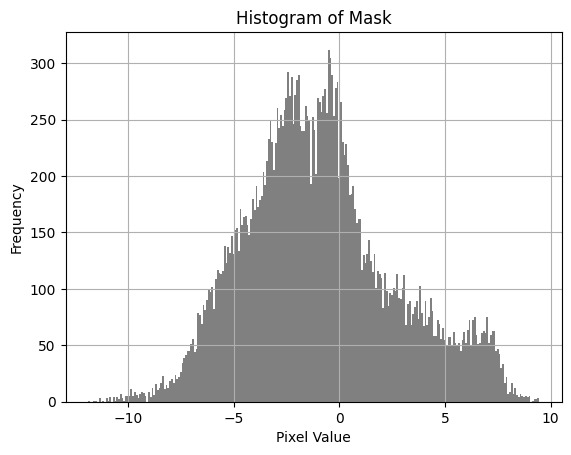

In [186]:
plt.hist(mask.ravel(), bins=256, color='gray')
plt.title('Histogram of Mask')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [157]:
output.shape

(300, 38)

In [159]:
model.names[2]

'screen'

In [158]:
xywh_list = []
for detection in output:
    x, y, w, h = detection[:4]
    xywh_list.append([x, y, w, h])
    print(detection[4], detection[5])
xywh_array = np.array(xywh_list)

0.8354638 2.0
0.83469385 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 1.0
0.0 1.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 1.0
0.0 2.0
0.0 2.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 1.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 1.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0 2.0
0.0

In [118]:
model.names[2]

'car'

In [56]:
model.names[0], model.names[16]

('person', 'dog')

In [78]:
xywh_array

array([[  -0.021011,     0.60823,     0.86849,     0.99646],
       [    0.18538,     0.19316,       0.927,     0.60221],
       [ 0.00010366,  0.00011295,    0.016828,    0.045169],
       ...,
       [     0.4686,      0.1309,     0.58212,     0.18669],
       [     0.4185,     0.12848,     0.58774,     0.18614],
       [    0.45409,     0.13277,     0.50599,     0.17892]], dtype=float32)

In [79]:
xywh_array[..., 0] *= 640
xywh_array[..., 1] *= 640
xywh_array[..., 2] *= 640
xywh_array[..., 3] *= 640
xywh_array

array([[    -13.447,      389.27,      555.83,      637.73],
       [     118.64,      123.62,      593.28,      385.41],
       [   0.066342,    0.072291,       10.77,      28.908],
       ...,
       [      299.9,      83.773,      372.55,      119.48],
       [     267.84,      82.229,      376.15,      119.13],
       [     290.62,       84.97,      323.83,      114.51]], dtype=float32)

In [80]:
xywh_array[..., 0] = np.clip(xywh_array[..., 0], 0, 640)
xywh_array[..., 1] = np.clip(xywh_array[..., 1], 0, 640)
xywh_array[..., 2] = np.clip(xywh_array[..., 2], 0, 640)
xywh_array[..., 3] = np.clip(xywh_array[..., 3], 0, 640)
xywh_array

array([[          0,      389.27,      555.83,      637.73],
       [     118.64,      123.62,      593.28,      385.41],
       [   0.066342,    0.072291,       10.77,      28.908],
       ...,
       [      299.9,      83.773,      372.55,      119.48],
       [     267.84,      82.229,      376.15,      119.13],
       [     290.62,       84.97,      323.83,      114.51]], dtype=float32)

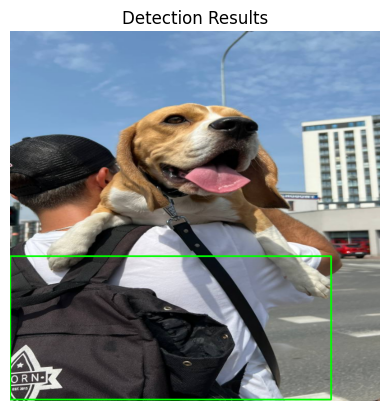

In [81]:
image = cv2.imread(image_path)
image_resized = cv2.resize(image, (640, 640))
image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

x1, y1, x2, y2 = xywh_array[0]
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
cv2.rectangle(image_resized, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(image_resized)
plt.title('Detection Results')
plt.axis('off')
plt.show()

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8n-640-3e4-mosaic-b16-ndata\weights\best_nms_float32.tflite for TensorFlow Lite inference...

image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples\IMG-20250324-WA0018.jpg: 640x640 1 id_card, 1 screen, 127.7ms
Speed: 2.8ms preprocess, 127.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


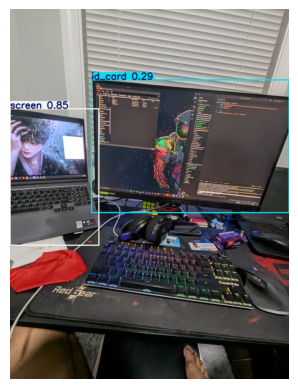

In [151]:
model = YOLO(model_path)  # Load a pretrained YOLOv8 model
results = model.predict(image_path, conf=0.2)
result_arr = results[0].plot()
plt.imshow(cv2.cvtColor(result_arr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\temp\yolov8n_float32.tflite for TensorFlow Lite inference...

image 1/1 c:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\temp\dog.jpeg: 640x640 1 person, 1 car, 1 dog, 1 backpack, 99.4ms
Speed: 4.2ms preprocess, 99.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


c:\Users\Sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


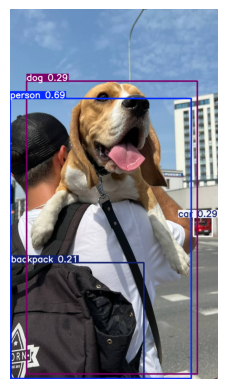

In [20]:
model = YOLO(r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\temp\yolov8n_float32.tflite')  # Load a pretrained YOLOv8 model
image_path = 'dog.jpeg'
# model = YOLO(model_path)  # Load a pretrained YOLOv8 model
results = model.predict(image_path, conf=0.2)
result_arr = results[0].plot()
plt.imshow(cv2.cvtColor(result_arr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

80

c:\Users\Sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


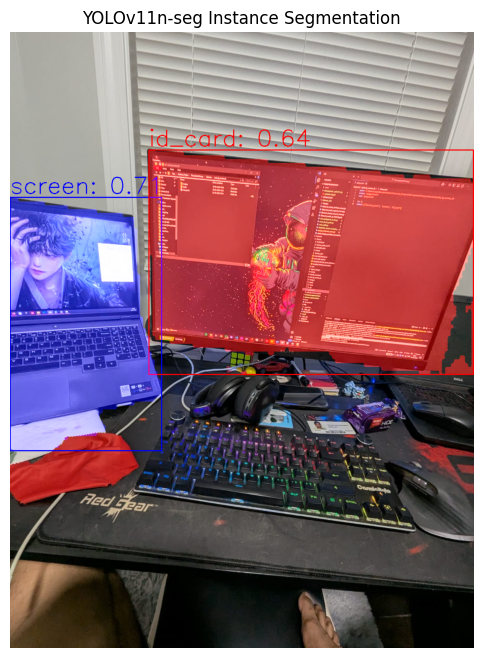

In [13]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

def preprocess_image(image_path, input_size=(640, 640)):
    img = cv2.imread(image_path)
    original_img = img.copy()
    img = cv2.resize(img, input_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=0)
    return img, original_img

def run_inference(interpreter, image):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    
    detection_data = interpreter.get_tensor(output_details[0]['index'])  # [1, 300, 38]
    proto_masks = interpreter.get_tensor(output_details[1]['index'])  # [1, 160, 160, 32]
    
    return detection_data, proto_masks

def process_detections(detection_data, proto_masks, original_img):
    img_height, img_width = original_img.shape[:2]
    
    # Remove batch dimension
    detection_data = detection_data[0]  # [300, 38]
    proto_masks = proto_masks[0]  # [160, 160, 32]
    
    results = []
    for i in range(len(detection_data)):
        # Skip if objectness score is low
        if detection_data[i, 4] <= 0.1:
            continue
        
        # Extract detection data
        x1, y1, x2, y2 = detection_data[i, :4]
        objectness = detection_data[i, 4]
        class_id = int(detection_data[i, 5])
        mask_coeffs = detection_data[i, 6:38]  # 32 mask coefficients
        
        # Generate instance mask (160x160)
        mask = np.zeros((160, 160), dtype=np.float32)
        for j in range(32):
            mask += mask_coeffs[j] * proto_masks[:, :, j]
        
        # Apply sigmoid to get probabilities
        mask = 1 / (1 + np.exp(-mask))
        
        # Threshold mask
        binary_mask = (mask > 0.5).astype(np.uint8)
        
        # Scale mask to original image dimensions
        scaled_mask = cv2.resize(binary_mask, (img_width, img_height))
        
        # Denormalize coordinates to original image dimensions
        x1_img = int(x1 * img_width)
        y1_img = int(y1 * img_height)
        x2_img = int(x2 * img_width)
        y2_img = int(y2 * img_height)
        
        # Create a box mask
        box_mask = np.zeros((img_height, img_width), dtype=np.uint8)
        box_mask[y1_img:y2_img, x1_img:x2_img] = 1
        
        # Get final instance mask by multiplying with box mask
        instance_mask = scaled_mask * box_mask
        
        results.append({
            'box': (x1_img, y1_img, x2_img, y2_img),
            'score': objectness,
            'class_id': class_id,
            'mask': instance_mask
        })
    
    return results

def visualize_results(original_img, results, class_names=None):
    if class_names is None:
        class_names = ['Class 0', 'Class 1', 'Class 2']
    
    output_img = original_img.copy()
    mask_overlay = np.zeros_like(original_img)
    colors = [(0, 255, 0), (0, 0, 255), (255, 0, 0)]  # RGB for display
    
    for result in results:
        x1, y1, x2, y2 = result['box']
        score = result['score']
        class_id = result['class_id']
        mask = result['mask']
        
        if class_id < 0 or class_id >= len(class_names):
            continue
            
        color = colors[class_id % len(colors)]
        
        # Draw bounding box
        cv2.rectangle(output_img, (x1, y1), (x2, y2), color, 2)
        
        # Add label
        label = f"{class_names[class_id]}: {score:.2f}"
        cv2.putText(output_img, label, (x1, y1 - 10), 
                   cv2.FONT_HERSHEY_SIMPLEX, 2, color, 2)
        
        # Create colored mask
        colored_mask = np.zeros_like(original_img)
        for c in range(3):
            colored_mask[:, :, c] = mask * color[c]
        
        # Add to mask overlay
        mask_indices = mask > 0
        mask_overlay[mask_indices] = colored_mask[mask_indices]
    
    # Combine mask overlay with original image
    output_img = cv2.addWeighted(output_img, 1.0, mask_overlay, 0.5, 0)
    
    return output_img

def main(image_path, model_path, class_names=None, plot=True):
    if class_names is None:
        class_names = ['Class 0', 'Class 1', 'Class 2']
    
    # Load TFLite model
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    
    # Process image
    input_img, original_img = preprocess_image(image_path)
    
    # Run inference
    detection_data, proto_masks = run_inference(interpreter, input_img)
    
    # Process detections
    results = process_detections(detection_data, proto_masks, original_img)
    
    # Visualize results
    output_img = visualize_results(original_img, results, class_names)
    
    # Convert BGR to RGB for display
    output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
    
    if plot:
        # Display results
        plt.figure(figsize=(12, 8))
        plt.imshow(output_img_rgb)
        plt.axis('off')
        plt.title('YOLOv11n-seg Instance Segmentation')
        plt.show()
    
    return output_img_rgb

model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolo11n-640-3e4-mosaic-b16-ndata\weights\y11n_best_float32.tflite'
image_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples\IMG-20250324-WA0018.jpg'

class_names = ['license_plate', 'id_card', 'screen']

output_img = main(image_path, model_path, class_names, plot=True)

In [ ]:
samples_dir = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples'
img_files = os.listdir(samples_dir)
img_files = [os.path.join(samples_dir, img) for img in img_files]

results = []
for img_path in img_files:
    output_img = main(img_path, model_path, class_names, plot=False)
    results.append(output_img)

show_images(results, shape=(5, 6), figsize=(35, 35))